# GMIT_Programming_for_data_analysis_Assignment
Contains the practical assignment for the programming for data analysis module

### Problem statement
The following assignment concerns the numpy.random package in Python [1]. You are
required to create a Jupyter [2] notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.





### 1. Explain the overall purpose of the package.

There is an interesting analogy between the numpy package itself, and its child package, numpy.random [3]. Just as numpy is so much more than a package that simply allows one to efficiently create multi-dimensional arrays, numpy.random is so much more than a package that just allows one to efficiently create random numbers (or pseudo-random numbers - pseudoransomness will be discussed below, under the 'SeedSequance' object). Just as numpy allows the user to easily and efficiently *do* things with matrices, numpy.random allows one to *do* things with random numbers, namely, generate them according to what are called * probability distributions*. In this sense, numpy.random allows the user to create both random numbers as well as numbers that are more or less probable. Numpy.random also has further use cases such as performing certain actions on arrays like randomly choosing a selection of items from the array of shuffling the contents of the array.

The 'structure' of the numpy.random package is as follows:

1. The object that the user is expected to interact with is the 'Generator' [4]. This is the object that can call the various functions which generate numbers according to a certain probability distribution (as well other functions such as shuffling).


2. This 'Generator' object itself uses another lower-level object that the user generally does not need to interact with, as this object can be created and handled in the background when the user creates the 'Generator' object. This lower-level object is the 'BitGenerator' [5], and this object is responsible for actually generating the random streams bits which the 'Generator' will then take up and apply a probablity distribution to. The 'BitGenerator' can be thought of as the conveyor belt that provides the numpy.random factory with random bits, and the 'Generator' can be thought of as the machine that 'decides' which bits to keep and which to discard according to the probability selection that the user, the machine operator, has selected on.


3. There is one further object in the numpy.random package, the 'SeedSequence' [6]. This object is used to determine the initial entropy that will be used by the 'BitGenerator' object to generate its pseudorandom bitstream. When a 'BitGenerator' object is created without first specifying the 'SeedSequence' to be used, the entropy is taken from the Operating System itself. The only case where this is not acceptable is where the psuedorandom bitstreams (and thus the pseudorandom numbers generated by the 'Generator' object) need to be repeatable for whatever reason. In this case, the user can create a 'SeedSequence' object, note the entropy of that object (SeedSequence.entropy), and then use that same initial entropy every time a 'BitGenerator' object needs to be created. This will allow the user to obtain identical sets of pseudorandom numbers (hence their *pseudorandomness* - they are actually created from a *specified* initial entropy and a *specified* algorithm).

Although one could first create a SeedSequence object using the SeedSequence constructor, then pass that to the BitGenerator constructor to create a a BitGenerator object, and finally pass that to a Generator constructor to create a Generator object to actually call the various functions that will generate the random numbers etc., the numpy documentation recommends simply creating a Generator object directly using the **default_rng** constructor, which handles the bit stream generation in the background. I will use this default constructor except where I wish to demonstrate what manually creating a SeedSequence object can achieve.

### 2. Explain the use of the “Simple random data” and “Permutations” functions.


There are four functions that can be called be a Generator object and fall under the heading, 'Simple random data':

1. **integers**(low[, high, size, dtype, endpoint]) - returns random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive). [7]


2. **random**([size, dtype, out]) - returns random floats in the half-open interval [0.0, 1.0). [8]


3. **choice**(a[, size, replace, p, axis, shuffle]) - generates a random sample from a given 1-D array [9]


4. **bytes**(length) - returns random bytes. [10]


What each of these functions does is clearly explained in the docs, and in any case there is not much that needs explaining. The **integers** function generate random integers, the **random** function generates random floating points or doubles, the **choice** function randomly selected a given number of items from an inputted array, and the **bytes** function generates random bytes of a length specified by the user.






1. The **integer** function The choice function has one mandatory parameter, which is the array or integer that a 'choice' will be made from (in case of an integer, the integer is first past to numpy.arange()). There are a number of other non-mandatory options:


* int or tuple of ints, **size** - in the case of an int, this determines the length the array returned, in that of a tuple of ints,  the dimensional shape is determined
* int or array of ints, **low** & **high** - determines the max and min numbers in the array to choose from, either for each choice or for that choice whose index is equal to that of this array of ints.
* dtype, **dtype** - the dtype to be returned (the default is np.int64, although unsigned 8, 16, 32 and 64 bit integers can also be specified)

In [1]:
import numpy as np
rng = np.random.default_rng()

print(rng.integers(2, size=10)) # random
print(rng.integers(1, size=10)) # only one value to choose from!

rng.integers([1, 3, 5, 7], high=[[10], [20]], dtype=np.uint16)

[0 0 0 1 1 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0]


array([[ 2,  9,  6,  8],
       [13,  5,  7, 13]], dtype=uint16)

2. The **random** function returns random floats from between 0.0 and 1.0, and takes the same size parameter as **integers**, with the dtype defaulting to np.float64 and with float32 specifiable. There is also an out parameter that can specify an array to contain the return floats. Note that because floats between 0.0 and 1.0 are returned, if one wants to extend the range of values generated one can multiply the result by the desired range, and to alter the minimum value one adds or subtracts a the desired minimum to/from the result. The maximum value is them automatically set through this also.

In [2]:
5 * rng.random((3, 2)) - 5

array([[-4.37835107, -4.32405203],
       [-0.28947252, -1.63400461],
       [-2.77887745, -3.76031847]])

3. The **choice** function has one mandatory parameter, which is the array or integer that a 'choice' will be made from (in case of an integer, the integer is first past to numpy.arange()). There are a number of other non-mandatory options, including size, as above:


* boolean, **replace** - whether the chosen values are put back into the original array so that they can be chosen again, the default is True
* arraylikme, **p** - an array, equal in length to the inputted array / arange, of floating points less between 0.0 and 1.0, representing the probability that the corresponding item in the inputted array will be chosen
* int, **axis** - which dimension should values be selected from (0, the default, represents rows, 1 columns)
* boolean, **shuffle** - whether the order of the selected numbers should be rearranged

In [3]:
print(rng.choice(5))
print(rng.choice([0,1,2,3,4]))
print(rng.choice(5, p=[0,0,0,0,1])) # here 4 will always be chosen
print(rng.choice(5, size=(4,4), axis=1))
print(rng.choice(10, size=10, replace=False)) # note that each value will only be chosen once
print(rng.choice(10, size=10))
print(rng.choice(10, 10, shuffle=False)) # shuffling has little effect, as the numbers are already chosen pseudorandomly

1
3
4
[[0 4 4 1]
 [4 3 0 0]
 [1 1 1 1]
 [0 0 4 0]]
[7 0 6 4 9 1 5 8 3 2]
[2 2 6 7 8 2 7 6 1 6]
[2 4 2 5 6 3 7 7 9 1]


4. The **bytes** function only takes one parameter,length, which determines the number of bytes returned. This parameter is mandatory.

In [4]:
# print(rng.bytes()) will result in a TypeError
# print(rng.bytes([1])) will result in a TypeError
print(rng.bytes(1))
print(rng.bytes(5))
print(rng.bytes(10))

b'\xc9'
b')\xde\x10\x8d\x1e'
b'\xd0e\x82 \x1c\xfc\x95\xdd\xc8H'


#### 'Permutations'

The two Generator functions that fall under the heading, 'Permutations', differ from each other only slightly. **shuffle** shuffles the contents of an array *in-place*, i.e. changing the original array. **permutation**, on the other hand, replicates the array and then shuffles the replication, leaving the original array unchanged. Because **shuffle** does not create a new array, it also, does not return anything, unlike **permutation**, which returns the new array. Where a multi-dimensional array is inputted to either functions, an optional parameter, **axis** can be specified. This must be an int, and determines which dimension is to be shuffled, 0 for rows (the default) and 1 for columns.

In [5]:
array = np.arange(9)
rng.permutation(array)
print(array) # the array has not changed
rng.shuffle(array)
print(array) # the array has  changed

[0 1 2 3 4 5 6 7 8]
[4 5 3 2 6 7 1 8 0]


### 3. Explain the use and purpose of at least five “Distributions” functions.


#### 1. Binomial Distribution 

The binomial distribution is the distribution of numbers that occurs when one counts the number of times a given event of probability 'p' occurs for a set of 'n' events over a given number of trials. Flipping a coin ten times and counting the number of times heads turns up, and then repeating this ten more times, would give one a binominal distribution. The binomial distribution in most cases approximates to the normal distribution, although there are differences between the two distributions.
1. Binomial distribution is a discrete probability distribution (there are a finite set of values for the variable whose values we are measuring, true or false and the number of times we perform a trial) whereas the normal distribution is a continuous distribution (there are theoretically an infinite number of values for the variable being measured).
2. The probability mass functions (which determine the probability that the measured variable is exactly equal to some value) of both are different (technically the normal distribution does not even have a pmf, as pmfs are exclusive to discrete random variable - rather it has a probability distribution function). [19]
3. Binomial distribution is approximated with normal distribution under certain conditions but not the other way around. [15]

Numpy's  random.binomial function takes in a number of trials, the probability of each trial resulting in a True value, and the number of sets of trials, returning an array whose length is the number of sets of trials run, in this case {len(s)}, \
with each value in the array representing the number of times the trials in each set of trials resulted in a 'True' outcome.

A succinct yet easily comprehensible explanations of the relation between the Test Statistic and the p-value is found on Wikipedia:

> If ${\displaystyle T}$ is a real-valued random variable representing some function of the observed data, to be used as a test-statistic for testing a hypothesis ${\displaystyle H}$ because large values of ${\displaystyle T}$ would seem to discredit the hypothesis, and if it happens to take on the actual value {\displaystyle t}t, then the p-value of the so called one-sided test of the null-hypothesis ${\displaystyle H}$ based on that test-statistic is the largest value of the probability that ${\displaystyle T}$ could be larger than or equal to ${\displaystyle t}$ if ${\displaystyle H}$ is true. [18]

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
binom = rng.binomial(n, p, 10) # 10 represents the number of sets of trials
print("The collections package's 'Counter' function is a useful way \
to understand the results without having to plot them. \
As the probability of True is here 0.5, we would expect, for sets of ten \
events \(which we can think of as coin tosses\), we would most \
frequently get 5 true outcomes, followed by 4 or 6 true outcomes, \
following by 3 and 7, then 2 and 8, 1 and 9, and finally, 0 and 10. \
Of course, the likelihood of this order increases with the number of trials.\n")
print(Counter(binom))
binom = rng.binomial(n, p, 50)
print(Counter(binom))
binom = rng.binomial(n, p, 250)
print(Counter(binom))
binom = rng.binomial(n, p, 1000)
print(Counter(binom))

print("\nWe can see this more easily with a histogram:")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,7))
plt.suptitle("No. of heads per 10 coin tosses - for 10, 50, 250 and 1000 trials")

binom = rng.binomial(n, p, 10)
labels, counts = np.unique(binom, return_counts=True)
ax1.bar(labels, counts, align='center', edgecolor='k')
plt.gca().set_xticks(np.arange(11))
ax1.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 50)
labels, counts = np.unique(binom, return_counts=True)
ax2.bar(labels, counts, align='center', edgecolor='k')
ax2.set_xticklabels(np.arange(11))

binom = rng.binomial(n, p, 250)
labels, counts = np.unique(binom, return_counts=True)
ax3.bar(labels, counts, align='center', edgecolor='k')
ax3.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1250)
labels, counts = np.unique(binom, return_counts=True)
ax4.bar(labels, counts, align='center', edgecolor='k')
ax4.set_xlabel("No. of heads after 10 coin tosses")
plt.show()

The collections package's 'Counter' function is a useful way to understand the results without having to plot them. As the probability of True is here 0.5, we would expect, for sets of ten events \(which we can think of as coin tosses\), we would most frequently get 5 true outcomes, followed by 4 or 6 true outcomes, following by 3 and 7, then 2 and 8, 1 and 9, and finally, 0 and 10. Of course, the likelihood of this order increases with the number of trials.

Counter({6: 4, 4: 2, 5: 2, 3: 1, 2: 1})
Counter({5: 17, 6: 12, 4: 9, 7: 5, 3: 4, 2: 2, 1: 1})
Counter({4: 63, 5: 62, 6: 43, 7: 28, 3: 28, 2: 12, 8: 10, 1: 3, 9: 1})
Counter({5: 265, 6: 204, 4: 172, 3: 138, 7: 114, 2: 43, 8: 40, 1: 13, 9: 10, 10: 1})

We can see this more easily with a histogram:


<Figure size 1500x700 with 4 Axes>

By increasing the number of trials per set as well as the number of sets, and plotting a scatter plot of the count of True values per set of trials, one can begin to see the similarity with the bell curve of the normal distribution, which will be the next distribution I will explore. Note also that although in this case I have changed the probability of heads (True) to 0.7, the shape of the curve appears to remain unaffected.

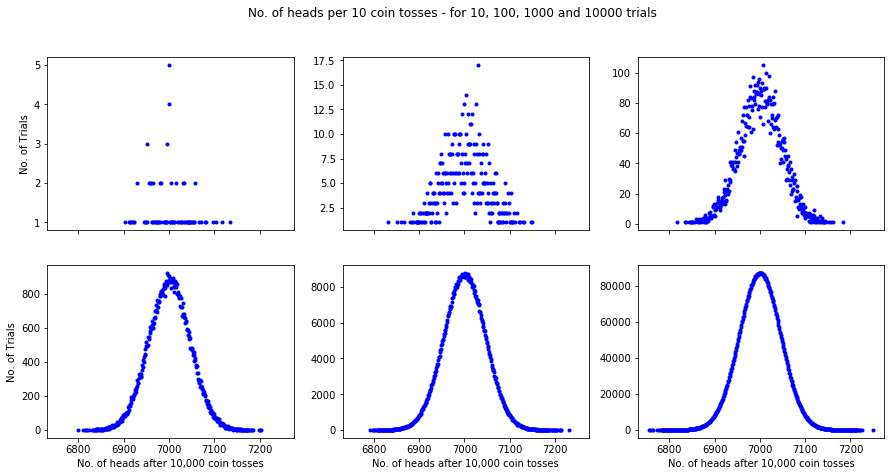

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(15,7))
plt.suptitle("No. of heads per 10 coin tosses - for 10, 100, 1000 and 10000 trials")

n, p = 10000, .7  # number of trials, probability of each trial

binom = rng.binomial(n, p, 100)
labels, counts = np.unique(binom, return_counts=True)
ax1.plot(labels, counts, 'b.')
ax1.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1000)
labels, counts = np.unique(binom, return_counts=True)
ax2.plot(labels, counts, 'b.')


binom = rng.binomial(n, p, 10000)
labels, counts = np.unique(binom, return_counts=True)
ax3.plot(labels, counts, 'b.')

binom = rng.binomial(n, p, 100000)
labels, counts = np.unique(binom, return_counts=True)
ax4.plot(labels, counts, 'b.')
ax4.set_xlabel("No. of heads after 10,000 coin tosses")
ax4.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1000000)
labels, counts = np.unique(binom, return_counts=True)
ax5.plot(labels, counts, 'b.')
ax5.set_xlabel("No. of heads after 10,000 coin tosses")

binom = rng.binomial(n, p, 10000000)
labels, counts = np.unique(binom, return_counts=True)
ax6.plot(labels, counts, 'b.')
ax6.set_xlabel("No. of heads after 10,000 coin tosses")
plt.show()

I will now run a D'Agostino K^2 test [16] to test if this distribution, where p is 0.7, n is 10,000 and the number of sets of trials ranges from , could have arisen from normally distributed data. This test computes two values, skew and kurtosis:
* Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
* Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
Scipy.stats has a 'normaltest' function that performs this test, returning a value (the 'Test Statistic' [17]) that is generated from the skew and the kurtosis of the data, as well as a p-value. Of course, the generation of a Test Statistic and a p-value is a common feature of statistical tests. Essentially, the evaluation process is as follows:

1. Once the data is pushed through the testing function, a single value, the Test Statistic, is produced. This value can be said to 'represent' the data from the perspective of the test.

2. Although generally a lower Test Statistic value indicates that the hypothesis being tested is correct, because the actual Test Statistic value is only meaningful from the perspective of the particular kind of test being run, we need to know how to interpret it independent of that particular kind of test. As such, a corresponding 'p-value' is generated, which essentially informs us of the probability that the Test Statistic generated would have been generated if our hypothesis was correct. If this p-value is close to zero, we can assume that the hypothesis was not correct. Generally, the maximum acceptable value of the p-value for a correctly assumed hypothesis (what is called the 'Null Hyopthesis') is 0.05.

Thus, if the p-value is less than 0.05, we would conclude that the distribution is not indeed normal. Interestingly, we will arrive at seemingly paradoxical conclusion: as the number of sets of trials increases and the curve appears to approximate closer and closer to the bell curve of the normal distribution, the D'Agostino K^2 test becomes more likely to tell us that the dataset has not come from a normal distribution. Indeed, once we reach 10,000,000 sets of trials, we are almost guaranteed to be told this. This shows that merely looking at a plot is not always sufficient to determine the kind of distribution that has produced the plot, as only when the binominal distributions below begin to appear indistuinguishable to the eye from the normal distrubution are we told by the test that they are not normally distributed. The test changes its verdict from yes to no as we increase the number of sets because the test has more 'ammo' as it were, and does not need to give the smaller sample sized data the benefit of the doubt. The test is essentially telling us whether it may be possible that the given data is normally distributed. At lower sample sizes, the test has less evidence to rule out that possibility, and thus is more inclined to produce a false negative (saying the data *may be* normally distributed when in fact we know it's not). We should, with the test, have more confidence in an analysis of a larger rather than a sample size - hence we assume that the lower sample sizes produce false negatives rather than saying that the larger sample sizes produce false negatives. However, I will provide further evidence below of why a binomial distrubtion with a probability of 0.7 is not normally distributed.

For 1000 sets of 10000 trials at probability 0.7, the results are as follows:
Test Statistic=0.642, P-value=0.726
The data appears to be normally distributed.


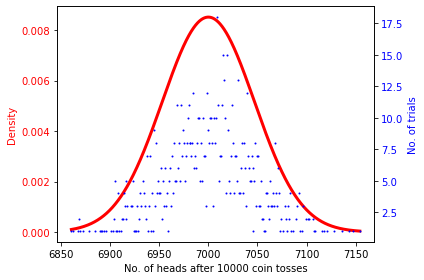

-------------------------------
For 10000 sets of 10000 trials at probability 0.7, the results are as follows:
Test Statistic=1.147, P-value=0.564
The data appears to be normally distributed.


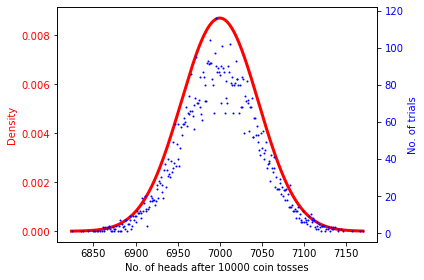

-------------------------------
For 100000 sets of 10000 trials at probability 0.7, the results are as follows:
Test Statistic=1.780, P-value=0.411
The data appears to be normally distributed.


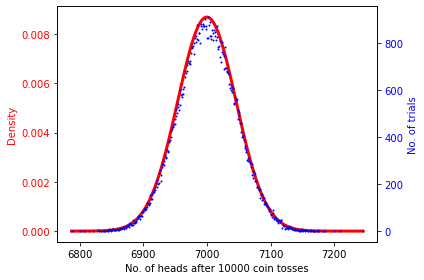

-------------------------------
For 1000000 sets of 10000 trials at probability 0.7, the results are as follows:
Test Statistic=23.078, P-value=0.000
The data does not appear to be normally distributed.


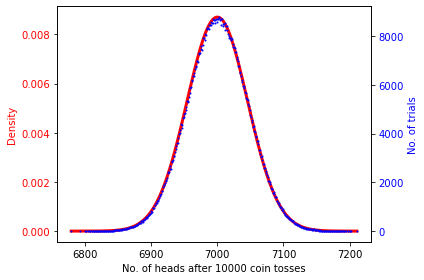

-------------------------------
For 10000000 sets of 10000 trials at probability 0.7, the results are as follows:
Test Statistic=119.992, P-value=0.000
The data does not appear to be normally distributed.


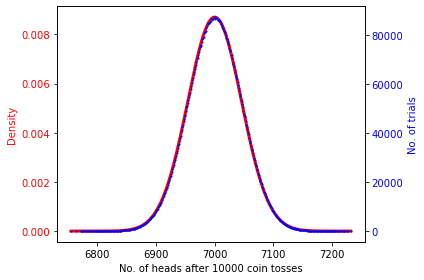

-------------------------------


In [8]:
import statistics
import scipy.stats as ss

n, p = 10000, 0.7
for i in [1000,10000,100000,1000000, 10000000]:
    binom = rng.binomial(n, p, i)
    fig, ax1 = plt.subplots()
    
    stat, pValue = ss.normaltest(binom)
    print(f"For {i} sets of {n} trials at probability {p}, the results are as follows:")
    print('Test Statistic=%.3f, P-value=%.3f' % (stat, pValue))
    alpha = 0.05 # we will accept anything over 95% certainty
    if pValue > alpha:
        print('The data appears to be normally distributed.')
    else:
        print('The data does not appear to be normally distributed.')
    
    color = 'red'
    ax1.set_xlabel(f'No. of heads after {n} coin tosses')
    ax1.set_ylabel('Density', color=color)
    ax1.plot(np.linspace(binom.min(), binom.max(), 1000), ss.norm.pdf(np.linspace(binom.min(), binom.max(), 1000), loc=np.mean(binom), scale=np.std(binom)), color=color, linewidth=3)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel('No. of trials', color=color)  # we already handled the x-label with ax1
    labels, counts = np.unique(binom, return_counts=True)
    ax2.plot(labels, counts, 'b.', ms=2)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print("-------------------------------")

The sample size, however, is not the only factor that will determine the outcome of the test. The test is also more likely to say that the data is normally distributed the closer p is to 0, as well as with increasing 'n'. Below are three more test outcomes and plots. Note that when p is 0.5 but n stays at 10,000, even if we increase the sample size to 10,000,000, the test actually tends to say that the data is likely normally distributed. However, if we then decrease n to 500 and 100, we see that the P-value decreases and the tests gives us a false negative, i.e. that the data is not normally distributed.

For 10000000 sets of 10000 trials at probability 0.5, the results are as follows:
Test Statistic=1.161, P-value=0.560
The data appears to be normally distributed.


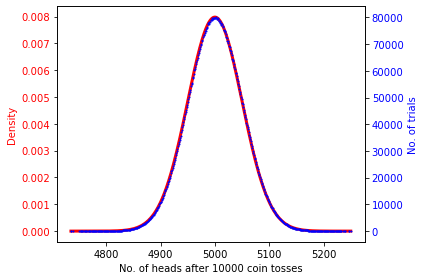

-------------------------------
For 10000000 sets of 500 trials at probability 0.5, the results are as follows:
Test Statistic=20.927, P-value=0.000
The data does not appear to be normally distributed.


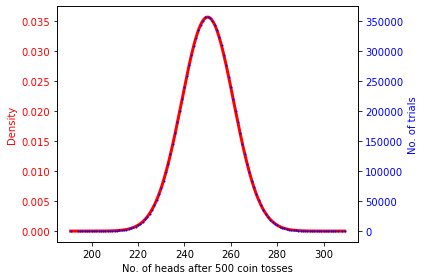

-------------------------------
For 10000000 sets of 100 trials at probability 0.5, the results are as follows:
Test Statistic=183.223, P-value=0.000
The data does not appear to be normally distributed.


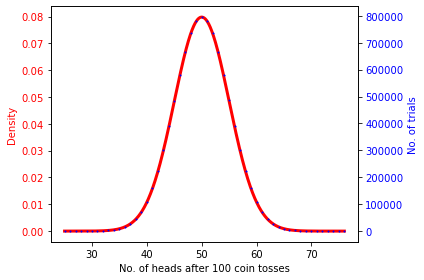

-------------------------------


In [9]:
for n,p,i in [(10000,0.5,10000000), (500,0.5,10000000), (100, 0.5, 10000000)]:
    binom = rng.binomial(n, p, i)
    fig, ax1 = plt.subplots()
    
    stat, pValue = ss.normaltest(binom)
    print(f"For {i} sets of {n} trials at probability {p}, the results are as follows:")
    print('Test Statistic=%.3f, P-value=%.3f' % (stat, pValue))
    alpha = 0.05 # we will accept anything over 95% certainty
    if pValue > alpha:
        print('The data appears to be normally distributed.')
    else:
        print('The data does not appear to be normally distributed.')
    
    color = 'red'
    ax1.set_xlabel(f'No. of heads after {n} coin tosses')
    ax1.set_ylabel('Density', color=color)
    ax1.plot(np.linspace(binom.min(), binom.max(), 1000), ss.norm.pdf(np.linspace(binom.min(), binom.max(), 1000), loc=np.mean(binom), scale=np.std(binom)), color=color, linewidth=3)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel('No. of trials', color=color)  # we already handled the x-label with ax1
    labels, counts = np.unique(binom, return_counts=True)
    ax2.plot(labels, counts, 'b.', ms=2)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print("-------------------------------")

Above, I stated that a test that tells us that a binominal distribution with p 0.7 is normally distributed is a false positive, and I also stated that one that tells us that a binominal distribution with p 0.5 is not normally distributed is a false negative. I will now prove this by plotting the probability mass functions for the binominal distributions of 'p's ranging from 0.5 to 0.95 against the probability density functions of normal distributions with the same mean and standard deviation as their binominal counterparts. We can see that, although both functions are clearly equal where 'p'=0.5 0.5,  the further 'p' is from 0.5, the less the two functions align, verifying our tests above, where large sample sizes revealed a binomial distribution is normally distributed where p is 0.5, but increasingly less so as p is closer to 0 or 1.

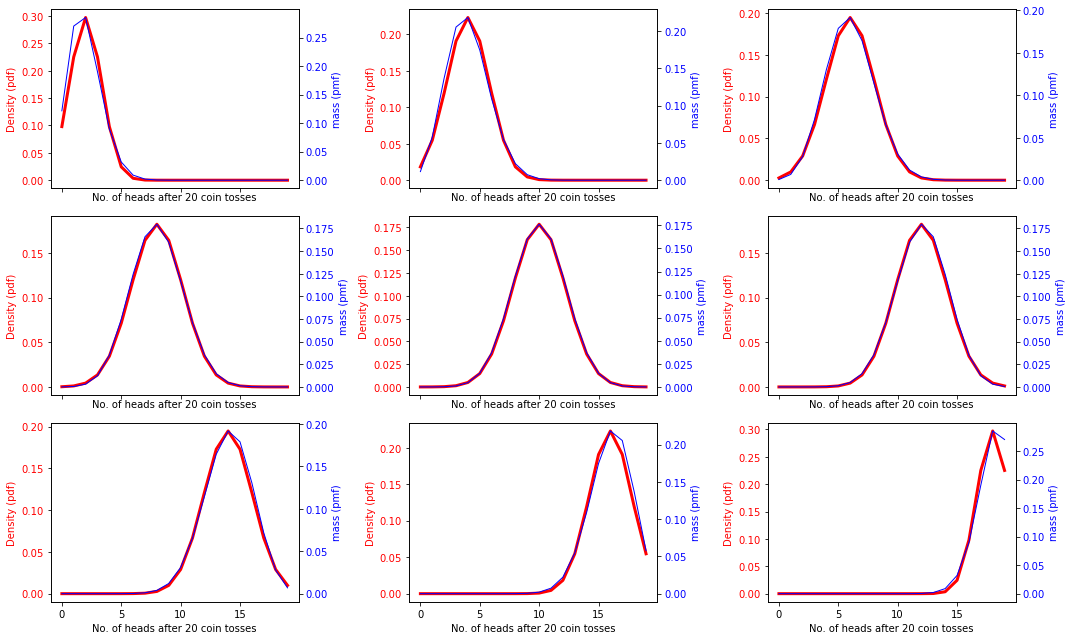

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(15,9))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,]
n, i = 20, 10000000

for ax,p in zip(axes, p):
    binom = rng.binomial(n, p, i)

    color = 'red'
    ax.set_xlabel(f'No. of heads after {n} coin tosses')    
    ax.set_ylabel('Density (pdf)', color=color)
    ax.plot(np.arange(0,n), ss.norm.pdf(np.arange(0,n), loc=np.mean(binom), scale=np.std(binom)), color=color, linewidth=3)
    ax.tick_params(axis='y', labelcolor=color)
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel('mass (pmf)', color=color)  # we already handled the x-label with ax1
    ax2.plot(np.arange(0,n), ss.binom.pmf(np.arange(0,n), n, p), color=color, linewidth=1)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### 2. Normal Distribution 

The Generator.normal function takes in three parameters, the mean of the distrubtion to be created, its standard deviation, as well as the (optional) size of the output shape (teh default is a one dimensional array).

The first thing to note about the normal distribution is that if we plot the values against their counts, we will not arrive at the bell-curve-like plot above, but rather a single horizontal line. This is because the normal distribtion is *continous* rather than discrete, meaning that there is an infinite amount of possible values, and as such that most likely each value will only appear once.

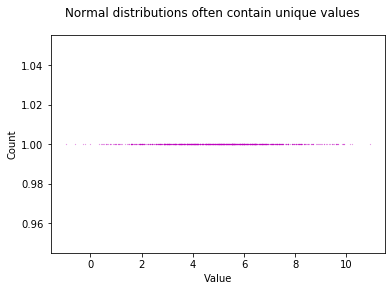

In [11]:
mu, sigma = 5, 2 # mean and standard deviation

norm = rng.normal(mu, sigma, 1000)
labels, counts = np.unique(norm, return_counts=True)
plt.plot(labels, counts, 'm.', ms=0.3)
plt.suptitle('Normal distributions often contain unique values')
plt.gca().set_xlabel('Value')
plt.gca().set_ylabel('Count')
plt.show()

The second thing to note about the normal distribution is its actual definition, which involves four statistical properties, the mean, standard deviation, skewness and kutosis of the distribution. For any normal distribution:

1. Symmetry about the mean - half the values should be less than the mean (and half more), giving it a skewness of 0.
2. The values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.
3. A kutosis of  3 - kutosis represents how fat the tails of a distribution are.

The formula for the probability density function for the normal disteribution is:

$${\displaystyle \varphi (x)={\frac {1}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}x^{2}}}$$

As the numpy page on the normal distribution demonstrates, we can plot the PDF using the mean and the standard deviation, or we can just call the scipy.normal.pdf function, both of which are shown below (I have also thrown in a D'Agostino Test):

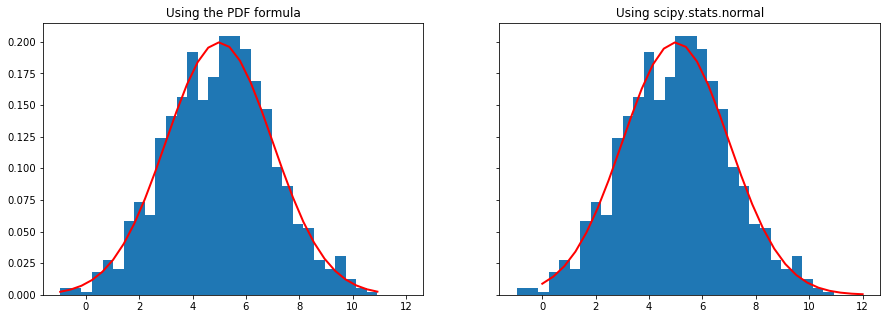

Test Statistic=1.185, P-value=0.553
The data appears to be normally distributed.
The stats for our random normal distribution are as follows: 
DescribeResult(nobs=1000, minmax=(-0.955210029724685, 10.924580337768987), mean=5.021031204111987, variance=3.9179519297505268, skewness=0.014724811868106294, kurtosis=-0.1668144511261369)


In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

count, bins, ignored = ax1.hist(norm, 30, density=True)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
ax1.set_title("Using the PDF formula")
count, bins, ignored = ax2.hist(norm, 30, density=True)
ax2.plot(np.linspace(0, 12, 30), ss.norm.pdf(np.linspace(0, 12, 30), mu, sigma),
         linewidth=2, color='r')
ax2.set_title("Using scipy.stats.normal")
plt.show()

stat, pValue = ss.normaltest(norm)
print('Test Statistic=%.3f, P-value=%.3f' % (stat, pValue))
alpha = 0.05 # we will accept anything over 95% certainty
if pValue > alpha:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')

print("The stats for our random normal distribution are as follows: ")
print(ss.describe(norm))

As expected, we see that the skewness of the sample is almost zero, meaning the sample is symmetric about the mean, and most (in fact all in this case) values are within two standard deviations of the mean. However, the kurtosis is not 3 as we would expect of a normal distribution. This is because scipy.stats.describe() normalizes the kurtosis value in the case of a normal distribution, so a kurtosis of 0 actually indicates a normal distribution here.

<br>
<br>
<br>
<br>
<br>


#### 3.  The Poisson Distribution 

Next, I will explore a distribution that is not symmetrical, but is similar in meaning to the binominal distribution. The definition of the Poisson á la Wikipedia is succint:

> The Poisson Distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

Where the binomial distribution gives us the probability that one event will turn out a certain way (and also how many times it will turn out that way if repeated a set of number), the Poisson distribution gives us the probability that a certain event will occur a certain number of times in a given time (or even space) internal, where the event has a constant mean rate of occurence, and is not affected by past occurences. The probability mass function of a Poisson distribution is:

$$\!f(k;\lambda )=\Pr(X=k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}},$$

where $k$ is the number of occurences of the event in question and $\lambda$ is the interval, which is let be equal to the mean rate of occurence of the event. Note that like the binomial distribution this is also a discrete probability distribution, because x axis always represents the number of times, $k$ that the given event occurs, and as such $k$ is an integer, i.e. not a continuous, i.e. real, number.

The probability mass function of the Poisson distribution takes in one parameter, the interval which is also the mean rate of occurence, and when plotting the function, the x axis represents the number of occurence to occur within the interval. As one would expect, the function is highest around x=interval, although it is not necessary symmetrical around that point. Becuase this is a discrete distribution, with a minimum x value of 1, where the interval/mean is close to 1, the distribution will be skewed towards the left, as there are naturally more options to the right of the mean, and as such the distribution to the right of the mean is much more spread out than the distribution to the left. As the plots below show, even where the mean/interval is around 10, the distribution begins to become symmetric, and with even higher values the distribution appears to approximate towards the normal distribution.

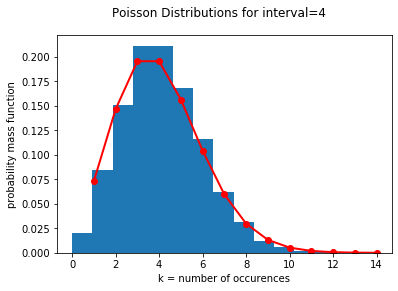

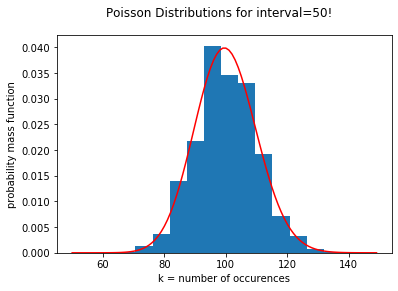

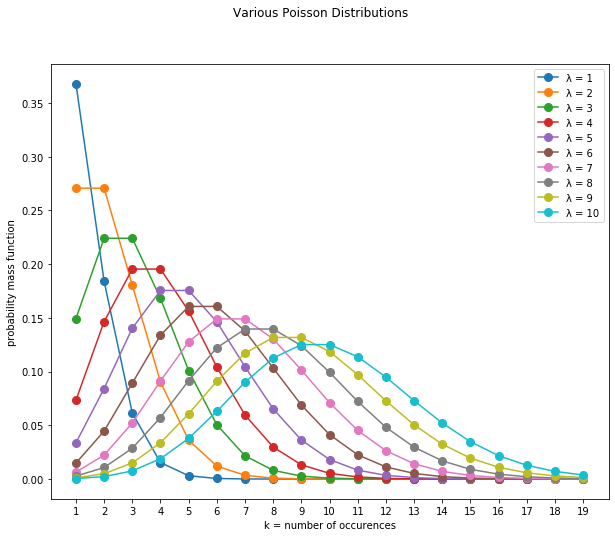

In [53]:
pois = rng.poisson(4, 10000) # the first parameter is the interval, the second the number of total events
count, bins, ignored = plt.hist(pois, 14, density=True)
plt.plot(np.arange(1, 15), ss.poisson.pmf(np.arange(1, 15), 4), color="r", linewidth="2", linestyle="-", marker="o")
plt.suptitle("Poisson Distributions for interval=4")
plt.xlabel("k = number of occurences")
plt.ylabel("probability mass function")
plt.show()


pois = rng.poisson(100, 10000) # the first parameter is the interval, the second the number of total events
count, bins, ignored = plt.hist(pois, 14, density=True)
plt.plot(np.arange(50, 150), ss.poisson.pmf(np.arange(50, 150), 100), '-r')
plt.suptitle("Poisson Distributions for interval=50!")
plt.xlabel("k = number of occurences")
plt.ylabel("probability mass function")
plt.show()


plt.figure(figsize=(10,8))
plt.xlabel("k = number of occurences")
plt.ylabel("probability mass function")
plt.xticks(range(1,20), range(1,20))
ks = [1,2,3,4,5,6,7,8,9,10]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]
for k, color in zip(ks, colors):
    plt.plot(np.arange(1, 20), ss.poisson.pmf(np.arange(1, 20), k), linestyle='-', marker='o', ms="8", color=color, label=f"λ = {k}")
    plt.suptitle("Various Poisson Distributions")
    plt.legend()
plt.show()

<br>
<br>
<br>
<br>


#### 4.  The Exponential Distribution

The exponential relationship is closely related to the Poisson. Where the latter represents the probability of a certain number of events occuring in a given internal, the exponential distribution represents the probability that an event will occur in a given internal. It is a continuous distribution, as the x axis represents time, which is not restricted to integers, and its probability density function is as follows, where $\beta$ represents the scale-parameter, which is equal to $1/𝜆$, and where 𝜆 is the rate parameter that we saw in the Poisson distribution:

$$ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$$

Like the Poisson distribution, however, the probability density function exponential distribution can also be defined using the rate parameter, which is a common alternative way of writing the function:

$${\displaystyle f(x;\beta )={\begin{cases}{\frac {1}{\beta }}e^{-x/\beta }&x\geq 0,\\0&x<0.\end{cases}}}$$


The numpy.random.exponential() function takes in the scale parameter and the optional size parameter.



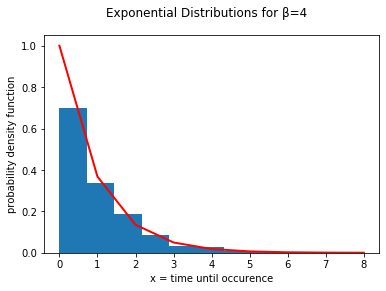

In [98]:
exp = rng.exponential(1, 1000)
count, bins, ignored = plt.hist(exp, 10, density=True)
plt.plot(np.arange(9), ss.expon.pdf(np.arange(9)), "r-", lw="2")
plt.suptitle("Exponential Distributions for β=4")
plt.xlabel("x = time until occurence")
plt.ylabel("probability density function")
plt.show()


### 4. Explain the use of seeds in generating pseudorandom numbers.

The supposedly random numbers generated by the Generator functions are termed pseudorandom because they are generated using a combination of an initial entropy state and an algorithm. If one knows the inital entropy state and the algorithm, then one knows what numbers will be generated, hence the not-quite-random nature of the numbers. Numpy uses the random.SeedSequance class to determine the initial entropy state, and the random.BitGenerator class to determine the algorithm and combine it with a SeedSequance object to create the random bit stream that will be used by the Generator class to generate random numbers according to a particular probability distribution. It is important to note, however, that while a bit stream can be reproducible if one known its entropy and algorithm, the actual distribution produced by the Generator functions using that bit stream will not be.

This SeedSequance object is used to determine the initial entropy that will be used by the 'BitGenerator' object to generate its pseudorandom bitstream. When a 'BitGenerator' object is created without first specifying the 'SeedSequence' to be used, the entropy is taken from the Operating System itself. The only case where this is not acceptable is where the psuedorandom bitstreams (and thus the pseudorandom numbers generated by the 'Generator' object) need to be repeatable for whatever reason, for example where the results of an algorithm need to be reproducible so that the algorithm's result can be verified by other others that are running the code implementing the alogorithm. In this case, the user can create a 'SeedSequence' object, note the entropy of that object (SeedSequence.entropy), and then use that same initial entropy every time a 'BitGenerator' object needs to be created. This will allow the user to obtain identical sets of pseudorandom numbers (hence their pseudorandomness - they are actually created from a specified initial entropy and a specified algorithm).

Although one could first create a SeedSequence object using the SeedSequence constructor, then pass that to the BitGenerator constructor to create a a BitGenerator object, and finally pass that to a Generator constructor to create a Generator object to actually call the various functions that will generate the random numbers etc., the numpy documentation recommends simply creating a Generator object directly using the default_rng constructor, which handles the bit stream generation in the background. 

PCG64, the bit stream generating algorithm that is the default used by the BitGenerator classs, makes a guarantee that a fixed seed and will always produce the same random integer stream, which is what we expect of a pseudorandom series of numbers [14].

In [14]:
sq1 = np.random.SeedSequence() # generate a SeedSequence
sq1.entropy
sq2 = np.random.SeedSequence(sq1.entropy)
print(np.all(sq1.generate_state(10) == sq2.generate_state(10))) # np.all checks if two numpy arrays' contents are equal

bg1 = np.random.PCG64(sq1) # PCG64 is the default BitGenerator algorithm
bg2 = np.random.PCG64(sq1)
print(bg1.random_raw()) # see that the BitGenerators' bit streams are the same
print(bg2.random_raw())

rg = np.random.Generator(bg1) # create our Generator with our BitGenerator
print(rg.integers(20)) # the Generator functions will still produce different results 
print(rg.integers(20)) # even though the underlying BitGenerators are the same


True
14104488440401857961
14104488440401857961
17
4


### References
[1] NumPy developers. Numpy. http://www.numpy.org/.

[2] Project Jupyter. Project jupyter home. http://jupyter.org/.

[3] https://numpy.org/doc/stable/reference/random/index.html

[4] https://numpy.org/doc/stable/reference/random/generator.html

[5] https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator

[6] https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence

[7] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

[8] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

[9] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

[10] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

[11] https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng

[12] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

[13] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

[14] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html

[15] https://www.differencebetween.com/difference-between-binomial-and-vs-normal-distribution/

[16] https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

[17] https://en.wikipedia.org/wiki/Test_statistic

[18] https://en.wikipedia.org/wiki/P-value

[19] https://www.datacamp.com/community/tutorials/probability-distributions-python